In [6]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize


In [7]:
# Generate synthetic data for regression
X, y, coefficients = make_regression(
    n_samples=100, n_features=2, noise=10, coef=True, random_state=5
)


def objective_function(beta, X, y):
    """
    Objective function for manual regression, calculating the sum of squared residuals.

    Parameters:
    beta (np.array): Coefficients for the regression model.
    X (np.array): Input features for regression.
    y (np.array): Actual target values.

    Returns:
    float: Sum of squared residuals.
    """
    y_pred = X @ beta
    return np.sum((y - y_pred) ** 2)


def fit_manual_regression(X, y):
    """
    Fits a regression model manually using the scipy minimize function.

    Parameters:
    X (np.array): Input features for regression.
    y (np.array): Actual target values.

    Returns:
    np.array: Optimal coefficients found by minimization.
    """
    beta_init = np.zeros(X.shape[1])  # Initializes coefficients to zeros
    result = minimize(objective_function, beta_init, args=(X, y))
    return result.x



Fitted coefficients (manual): [17.82424021 64.37726402]
Coefficients (scikit-learn): [17.79546387 64.53715909]
Intercept (scikit-learn): -0.9774676632953216
Comparison of first 5 predictions (manual vs scikit-learn):
Manual: [ -42.74048851  -24.06092156  -12.47221461 -110.69972997  -30.61316663]
Scikit-learn: [ -43.76042361  -25.16800163  -13.45609149 -111.86706702  -31.7559444 ]


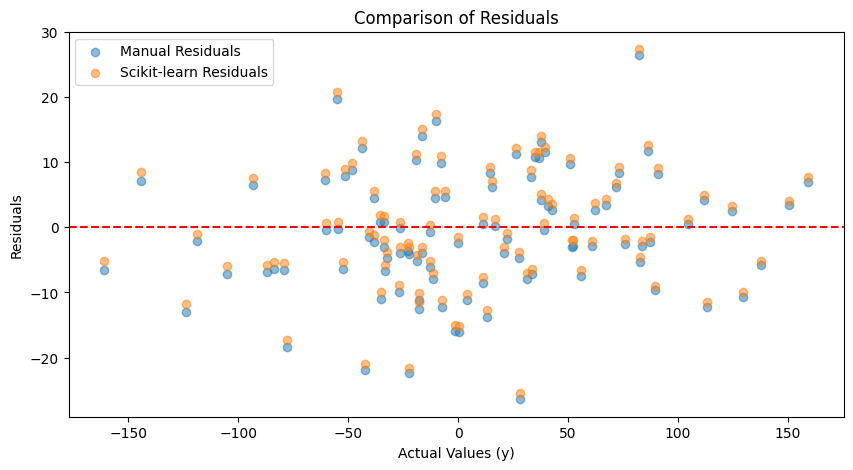

In [8]:
def compare_models(X, y):
    """
    Compares manual regression results to scikit-learn's LinearRegression model.

    Parameters:
    X (np.array): Input features for regression.
    y (np.array): Actual target values.
    """
    beta_manual = fit_manual_regression(X, y)

    # Predict using manual model
    y_pred_manual = X @ beta_manual

    # Fit and predict using scikit-learn model
    model = LinearRegression()
    model.fit(X, y)
    y_pred_sklearn = model.predict(X)

    # Print comparison results
    print("Fitted coefficients (manual):", beta_manual)
    print("Coefficients (scikit-learn):", model.coef_)
    print("Intercept (scikit-learn):", model.intercept_)
    print("Comparison of first 5 predictions (manual vs scikit-learn):")
    print("Manual:", y_pred_manual[:5])
    print("Scikit-learn:", y_pred_sklearn[:5])

    # Plot residuals
    residuals_manual = y - y_pred_manual
    residuals_sklearn = y - y_pred_sklearn

    plt.figure(figsize=(10, 5))
    plt.scatter(y, residuals_manual, alpha=0.5, label='Manual Residuals')
    plt.scatter(y, residuals_sklearn, alpha=0.5, label='Scikit-learn Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Comparison of Residuals')
    plt.xlabel('Actual Values (y)')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    compare_models(X, y)